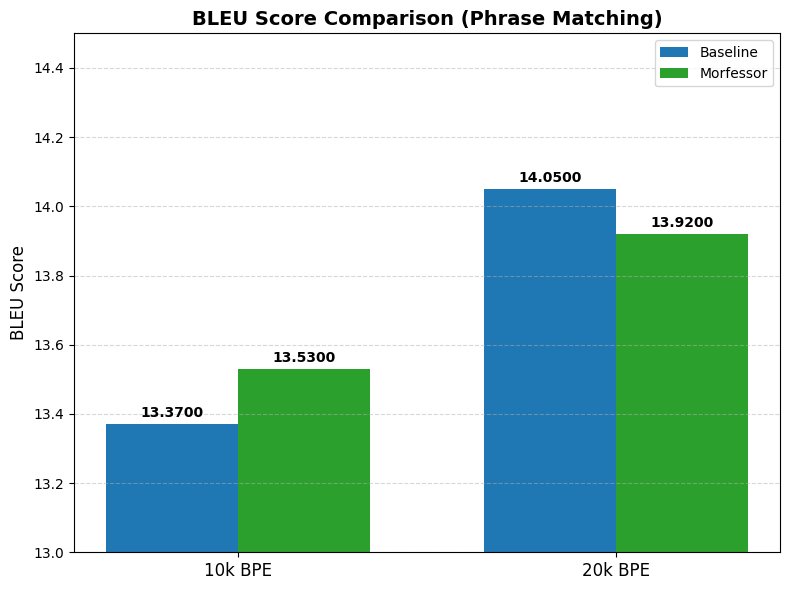

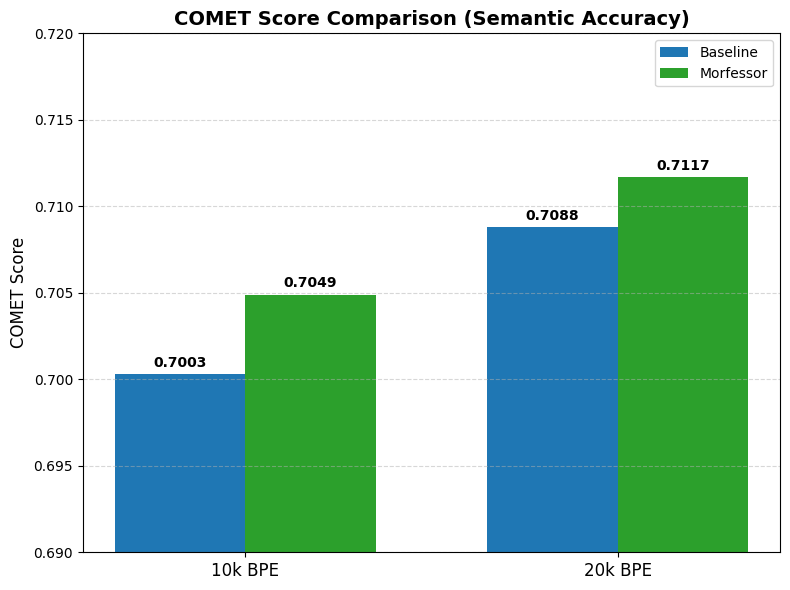

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# --- DATA ---
labels = ['10k BPE', '20k BPE']

# BLEU Data
bleu_baseline = [13.37, 14.05]   # Pipeline A
bleu_morfessor = [13.53, 13.92]  # Pipeline C (@@)

# COMET Data
comet_baseline = [0.7003, 0.7088]  # Pipeline A
comet_morfessor = [0.7049, 0.7117] # Pipeline C (@@)

x = np.arange(len(labels))
width = 0.35  # Width of the bars

# --- FUNCTION TO DRAW BAR CHARTS ---
def create_plot(baseline_data, morfessor_data, title, ylabel, filename, y_min, y_max):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Create Bars
    rects1 = ax.bar(x - width/2, baseline_data, width, label='Baseline', color='#1f77b4')
    rects2 = ax.bar(x + width/2, morfessor_data, width, label='Morfessor', color='#2ca02c')

    # Styling
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=12)
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    
    # Set Y-Limit to zoom in on the difference
    ax.set_ylim(y_min, y_max)

    # Attach labels on top of bars
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.4f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=10, fontweight='bold')

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    
    # Save file
    plt.savefig(filename, dpi=300)
    plt.show()

# --- GENERATE PLOT 1: BLEU SCORES ---
create_plot(
    baseline_data=bleu_baseline, 
    morfessor_data=bleu_morfessor,
    title='BLEU Score Comparison (Phrase Matching)',
    ylabel='BLEU Score',
    filename='bleu_scores_bar.png',
    y_min=13.0,
    y_max=14.5
)

# --- GENERATE PLOT 2: COMET SCORES ---
create_plot(
    baseline_data=comet_baseline, 
    morfessor_data=comet_morfessor,
    title='COMET Score Comparison (Semantic Accuracy)',
    ylabel='COMET Score',
    filename='comet_scores_bar.png',
    y_min=0.69,
    y_max=0.72
)